<h2 style='text-align:center'><b> ECommerce Churn</b></h1>
<h5 style="text-align: center;"> Naufal Amara Syihan</h2>

### Company Profile

The e-commerce company in question is a leading player in the online retail market, valued at $1 billion. This valuation reflects the company’s substantial market presence, diverse product offerings, and a loyal customer base. As a significant entity in the industry, the company likely has a well-established infrastructure, efficient logistics, and a strong brand reputation. The company’s extensive customer base, combined with a broad range of products priced between $1 and $1,000, positions it as a versatile and accessible shopping destination for consumers.

### Customer Retention and Acquisition

- **Customer Retention Cost (CRC): $6.8 per customer**  
  This cost indicates the company’s investment in keeping its existing customers loyal and engaged. CRC includes expenses related to loyalty programs, personalized customer service, retention campaigns, and other initiatives aimed at reducing customer churn. The relatively low CRC suggests that the company has implemented effective and efficient retention strategies. These strategies are likely optimized to maintain customer satisfaction at a minimal cost, ensuring that the company can maximize the lifetime value of each customer.

- **Customer Acquisition Cost (CAC): $68 per customer**  
  The CAC represents the average expenditure required to acquire a new customer. This includes marketing efforts, advertising campaigns, promotions, and sales activities. The high CAC relative to CRC highlights the competitive nature of the market, where significant resources are needed to attract new customers. This tenfold difference between CAC and CRC underscores the importance of customer retention for the company. Retaining existing customers is far more cost-effective than acquiring new ones, making it crucial for the company to focus on reducing churn to enhance profitability.

- **Cashback Rate: 6%**  
  The 6% cashback rate is a strategic move by the company to foster customer loyalty and encourage repeat purchases. This incentive program aims to increase customer engagement and spending by offering a financial reward for continued patronage. While the cashback rate enhances customer satisfaction and promotes repeat business, it also represents a cost that must be carefully managed to ensure it does not erode the company’s profit margins.

### Financial and Strategic Insights

With a valuation of $1 billion, the company’s financial health is robust, supported by a strong revenue stream and a diversified product range. The substantial difference between CAC and CRC highlights the strategic emphasis on customer retention as a key driver of profitability. The 6% cashback rate, while a significant expense, is a calculated investment in customer satisfaction and long-term loyalty.

### Customer Churn

Customer churn refers to the process by which customers discontinue their relationship with the company, either by canceling a subscription or ceasing to make purchases. Churn is a critical metric for the company, as it directly impacts revenue and growth. High churn rates can indicate underlying issues such as customer dissatisfaction, better offers from competitors, or changes in customer needs. Therefore, understanding and managing churn is essential for maintaining a stable and growing customer base.

### Problem Statement

The company faces a significant challenge in identifying customers who are at high risk of churning. The head of customer services, along with the financial and marketing departments, will be tasked with addressing this issue. The primary objective is to identify the characteristics and behaviors of customers who are likely to terminate their contracts or stop making purchases. Understanding these factors is crucial for implementing effective retention strategies, such as targeted promotions or personalized offers, to prevent customer churn.

Given that the company derives a significant portion of its revenue from subscription-based services, reducing churn is integral to sustaining long-term revenue streams. Satisfied customers who continue their subscriptions contribute to stable and predictable income, while churn can lead to significant revenue losses and increased acquisition costs.

### Goals

The primary goal of the machine learning model is to predict which customers are most likely to churn. By accurately identifying these customers, the company can take proactive measures to retain them, such as offering promotional discounts, enhancing customer service, or addressing specific pain points. The company aims to reduce the churn rate by 9%, which would significantly improve customer retention and overall profitability.

### Analytic Approach

To achieve this goal, the company will develop a supervised machine learning algorithm designed to predict the likelihood of customer churn. This model will analyze various customer characteristics, behaviors, and historical data to identify patterns that indicate a high risk of churn. The model will be deployed for use by salespersons during the initial subscription process, allowing them to take preventative measures to retain high-risk customers.

### Success Criteria

- **Type 1 Error (False Positive):**  
  Misidentifying a customer as likely to churn when they are not can lead to unnecessary spending on retention efforts. The company estimates a potential loss of $4,583 per month if 10% of customers are incorrectly targeted, based on the CRC of $6.8 per customer.

- **Type 2 Error (False Negative):**  
  Failing to identify a customer who is likely to churn can result in revenue loss and the need to invest more in customer acquisition. The company estimates that it would need to invest an additional $45.832 per month in CAC to replace 10% of customers lost to churn.

### Project Limitations

The success of this project may be impacted by potential disturbances in the company’s infrastructure, such as technical issues, data quality concerns, or limitations in the company’s ability to act on the predictions made by the model. Addressing these limitations will be crucial to ensure the effectiveness of the churn prediction model and the company’s overall retention strategy.

In [1]:
# Library

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder,RobustScaler,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import average_precision_score

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier  
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('D:\Coding Projects\eCommerceChurnCapstone3\data_ecommerce_customer_churn.csv')
df = data.copy()
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Data Features:
1. **`Tenure`**: The length of time a customer has been with the company.
2. **`WarehouseToHome`**: The distance between the company's warehouse and the customer's home.
3. **`NumberOfDeviceRegistered`**: The total number of devices registered under a particular customer's account.
4. **`PreferredOrderCategory`**: The category of products most frequently ordered by the customer in the last month.
5. **`SatisfactionScore`**: The customer's satisfaction score with the company's service.
6. **`MaritalStatus`**: The marital status of the customer.
7. **`NumberOfAddress`**: The total number of addresses associated with the customer.
8. **`Complaint`**: Indicates whether the customer has raised any complaints in the last month (yes/no).
9. **`DaysSinceLastOrder`**: The number of days since the customer placed their last order.
10. **`CashbackAmount`**: The average cashback amount received by the customer in the last month. Cashback refers to a small percentage of the amount spent that is refunded to the customer when they make purchases above a certain threshold.
11. **`Churn`**: A binary flag indicating whether the customer has churned (left the company) or not.


In [3]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [4]:
pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values
})

,Column Name,Data Type
0,Tenure,float64
1,WarehouseToHome,float64
2,NumberOfDeviceRegistered,int64
3,PreferedOrderCat,object
4,SatisfactionScore,int64
5,MaritalStatus,object
6,NumberOfAddress,int64
7,Complain,int64
8,DaySinceLastOrder,float64
9,CashbackAmount,float64


In [5]:
df.shape

(3941, 11)

The data itself is sufficient to answer the business question

#### **Null values**

In [6]:
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Unique' : [df[col].nunique() for col in df.columns],
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,NaN,NaN (%),Unique,Sample
Tenure,Tenure,float64,194,4.922608,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
WarehouseToHome,WarehouseToHome,float64,169,4.288252,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
NumberOfDeviceRegistered,NumberOfDeviceRegistered,int64,0,0.000000,6,"[4, 3, 6, 2, 5, 1]"
PreferedOrderCat,PreferedOrderCat,object,0,0.000000,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
SatisfactionScore,SatisfactionScore,int64,0,0.000000,5,"[3, 1, 4, 2, 5]"
MaritalStatus,MaritalStatus,object,0,0.000000,3,"[Single, Married, Divorced]"
NumberOfAddress,NumberOfAddress,int64,0,0.000000,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
Complain,Complain,int64,0,0.000000,2,"[0, 1]"
DaySinceLastOrder,DaySinceLastOrder,float64,213,5.404720,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
CashbackAmount,CashbackAmount,float64,0,0.000000,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


This data has some null values located in `Tenure` column as much as 4.9%, `WarehouseToHome` column as much as 4.2%, and `DaySinceLastOrder` as much as 5.4%.

#### **Duplicated values**

In [7]:
print(f'The data contains {df.duplicated().sum()} duplicated values')

The data contains 671 duplicated values


# Exploratory Data Analysis

examininig the distribution in numeric columns

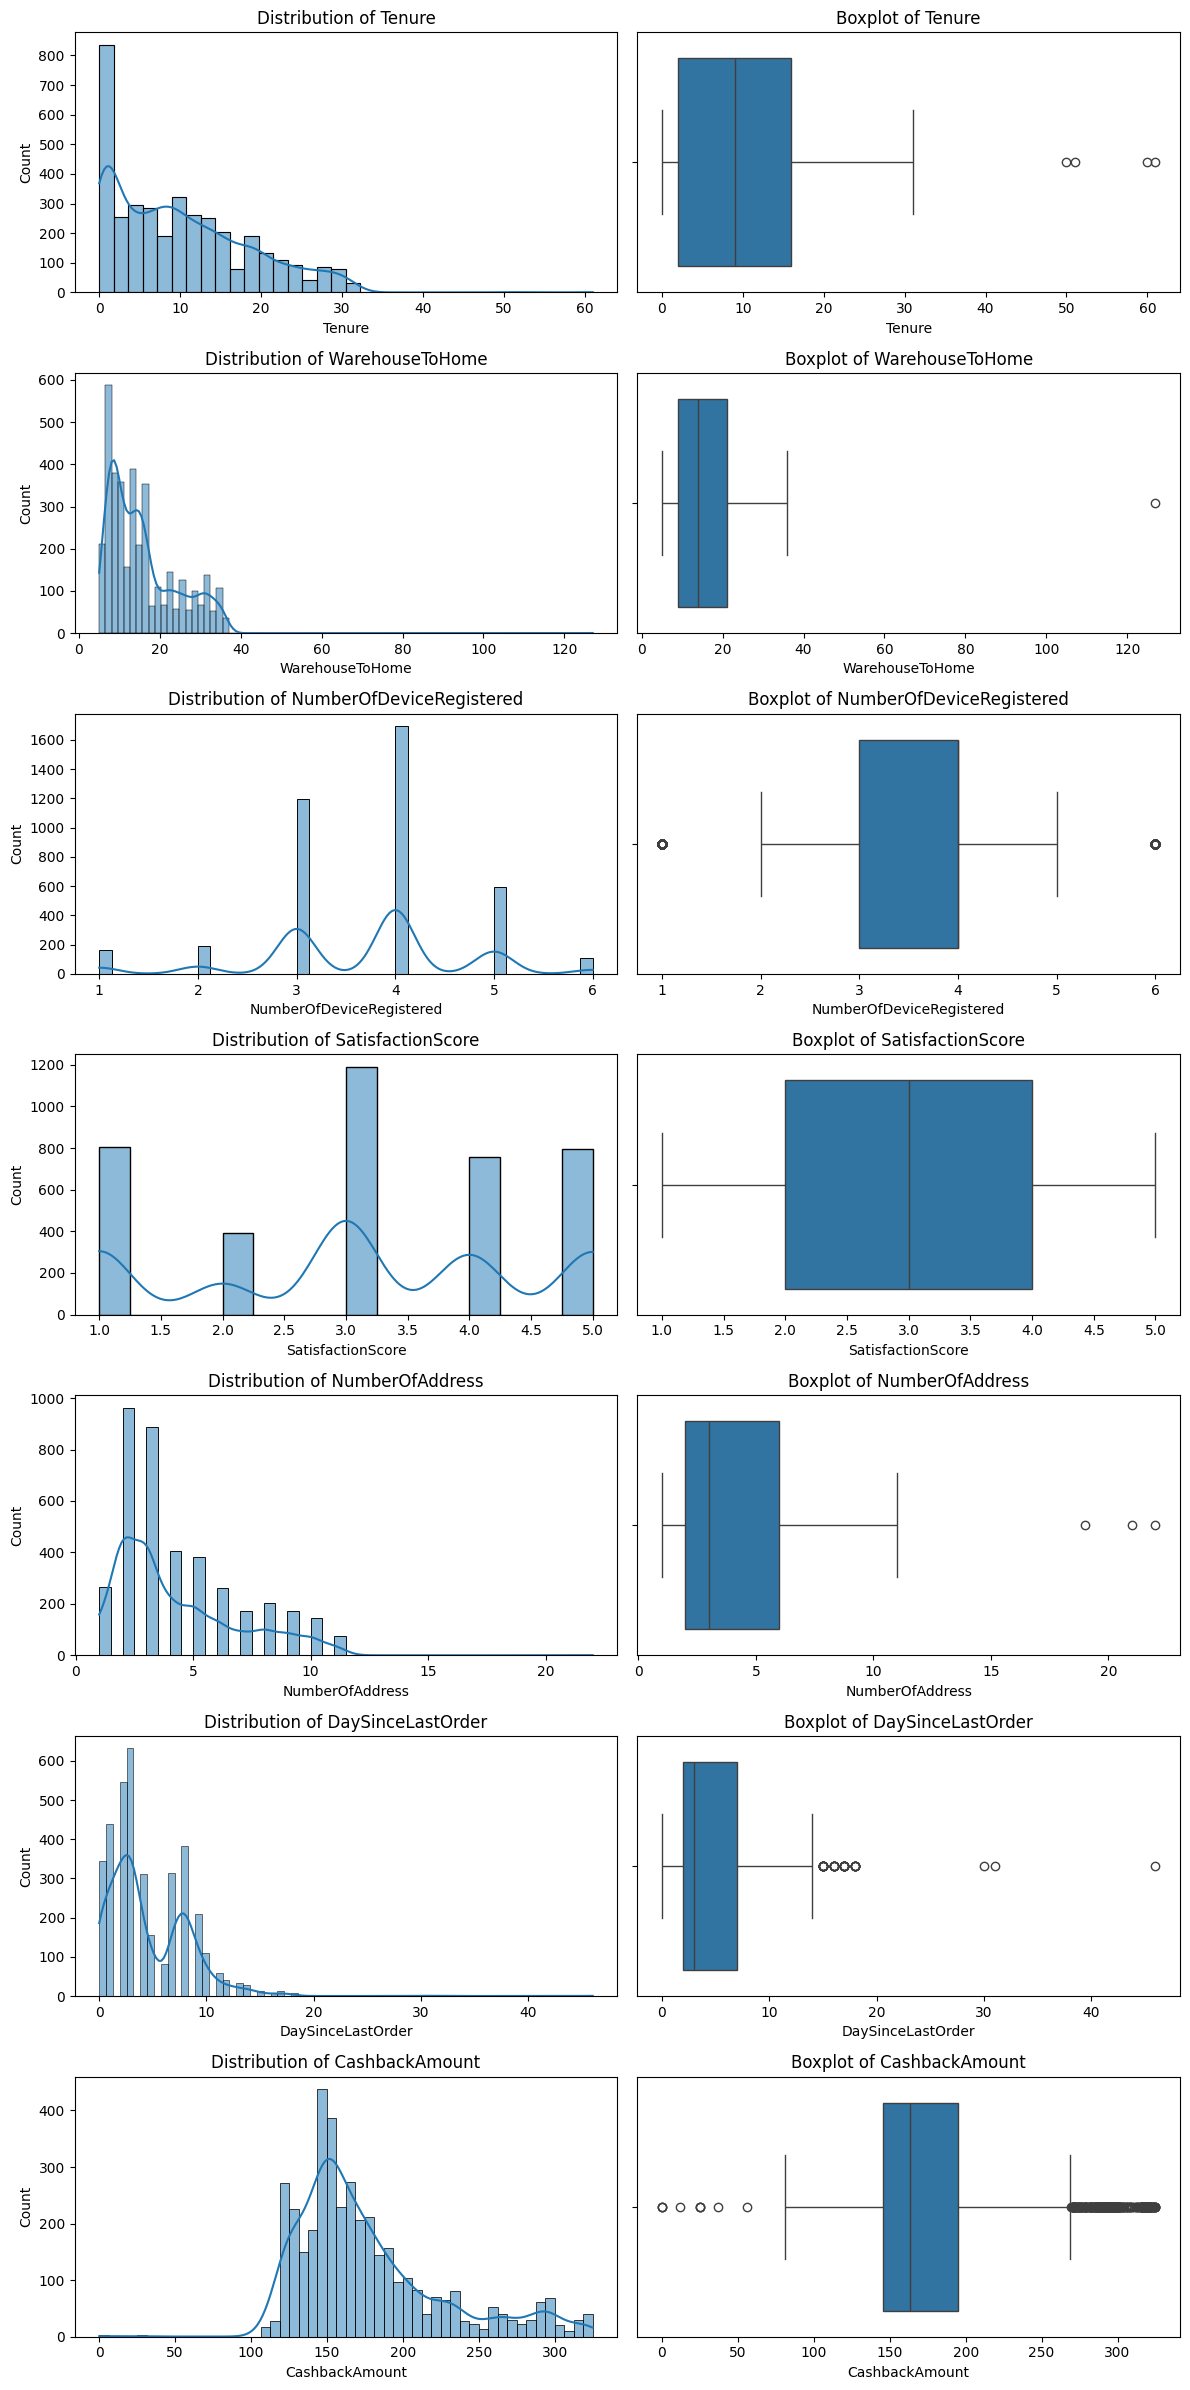

In [8]:
# Selecting the relevant columns from the DataFrame
numeric_columns = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']]

# Setting up a 4x2 grid for the subplots (each numeric column will have 2 subplots: histogram and boxplot)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 24))

# Flattening axes for easy iteration
axes = axes.flatten()

# Creating a histogram and a boxplot for each column
for i, col in enumerate(numeric_columns.columns):
    # Histogram
    sns.histplot(numeric_columns[col], ax=axes[i*2], kde=True)
    axes[i*2].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(x=numeric_columns[col], ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Boxplot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The analysis of the variables reveals that most of them exhibit right-skewed distributions, indicating that the majority of customers are concentrated at lower values with a few outliers at higher values. Specifically, `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `DaySinceLastOrder`, and `CashbackAmount` all show this pattern, with customers typically having shorter tenures, living closer to the warehouse, registering fewer addresses, making recent orders, and receiving lower cashback amounts, respectively, while a few customers stand out with significantly higher values in these categories. The `NumberOfDeviceRegistered` and `SatisfactionScore` variables display multimodal distributions, suggesting distinct customer segments or experiences, with different peaks indicating common numbers of registered devices and varying satisfaction levels. The boxplots further highlight these trends, confirming the skewness and revealing outliers across most variables, which indicate a subset of customers whose behaviors or characteristics differ notably from the majority. These insights suggest that while most customers exhibit similar patterns, there are distinct groups that may warrant targeted attention or tailored strategies.

In [9]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create an empty DataFrame to store the results
normality_results = pd.DataFrame(columns=['Column', 'W-Statistic', 'p-Value', 'Normal'])

# Perform Shapiro-Wilk test for each numeric column
for col in numeric_columns:
    w_stat, p_value = stats.shapiro(df[col].dropna())  # Shapiro-Wilk test
    normal = p_value > 0.05  # If p-value > 0.05, data is normally distributed
    normality_results = normality_results.append({'Column': col,
                                                  'W-Statistic': w_stat,
                                                  'p-Value': p_value,
                                                  'Normal': normal}, ignore_index=True)

# Display the results
normality_results

,Column,W-Statistic,p-Value,Normal
0,Tenure,0.919112,6.641874e-41,False
1,WarehouseToHome,0.869014,0.000000e+00,False
2,NumberOfDeviceRegistered,0.894194,0.000000e+00,False
3,SatisfactionScore,0.884754,0.000000e+00,False
4,NumberOfAddress,0.874494,0.000000e+00,False
5,Complain,0.563789,0.000000e+00,False
6,DaySinceLastOrder,0.892180,2.802597e-45,False
7,CashbackAmount,0.885266,0.000000e+00,False
8,Churn,0.455132,0.000000e+00,False


The summary table of the Shapiro-Wilk test results indicates that none of the columns in your dataset follow a normal distribution, as evidenced by the `Normal` value being `False` across all features. Although the W-Statistic values are relatively high (close to 0.9 for most features), suggesting the distributions are not severely skewed, the consistently low p-values (all near 0.000000) lead to the rejection of the null hypothesis of normality. Among the features, `Tenure` has the highest W-Statistic (0.919112), indicating it is the closest to a normal distribution, while `Churn` has the lowest W-Statistic (0.455132), reflecting its binary nature, which inherently deviates from normality. Features like `WarehouseToHome`, `NumberOfDeviceRegistered`, and `SatisfactionScore` also show high W-Statistics but fail to meet the strict criteria for normality. These findings suggest that you may need to consider data transformations (such as logarithmic or square root transformations) if your modeling approach assumes normality. Alternatively, using non-parametric methods or machine learning models that do not rely on the assumption of normality, such as decision trees or ensemble methods, might be more appropriate. The low W-Statistic for the `Churn` variable is expected given its binary nature, further emphasizing the need for careful consideration of the data's distribution in your analysis.

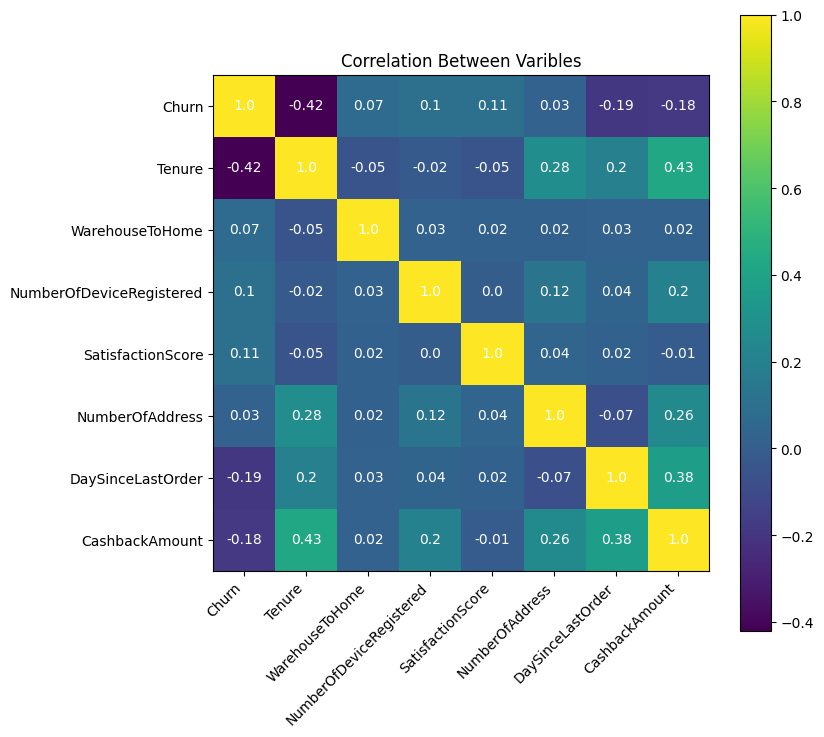

In [10]:
df_correlation = df[['Churn','Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']].corr(method= 'spearman')

plt.figure(figsize=(8, 8))                  # ukuran figure
plt.imshow(df_correlation)                  # heatmap
plt.title('Correlation Between Varibles')   # title
plt.colorbar()                              # colorbar

plt.xticks(range(len(df_correlation.columns)), df_correlation.columns, rotation=45, ha="right")
plt.yticks(range(len(df_correlation.columns)), df_correlation.columns)

# menambahkan anotasi
for i in range(len(df_correlation.values)):
    for j in range(len(df_correlation.values)):
        text = plt.text(j, i, round(df_correlation.values[i, j], 2),
                       ha="center", va="center", color="w")
        
plt.show() 

The correlation analysis reveals several key insights. The diagonal values in the matrix are all 1.0, as expected, since each variable perfectly correlates with itself. In terms of correlations with churn, `Tenure` shows a moderately strong negative correlation (-0.42), indicating that longer-tenured customers are less likely to churn, while `DaySinceLastOrder` (-0.19) and `CashbackAmount` (-0.18) exhibit weak negative correlations with churn, suggesting that more recent orders and higher cashback amounts are slightly associated with reduced churn risk. Interestingly, `SatisfactionScore` has a weak positive correlation (0.11) with churn, which is counterintuitive and may require further investigation since higher satisfaction scores are typically expected to correlate with lower churn. Other variables like `WarehouseToHome`, `NumberOfDeviceRegistered`, and `NumberOfAddress` show very weak correlations with churn, indicating minimal direct influence. Additionally, there are moderate correlations between other variables, such as `Tenure` and `CashbackAmount` (0.43), `NumberOfAddress` and `Tenure` (0.28), and `DaySinceLastOrder` and `CashbackAmount` (0.38), suggesting some interdependencies, with longer-tenured customers generally receiving higher cashback and having more addresses on file. Overall, while `Tenure`, `DaySinceLastOrder`, and `CashbackAmount` are the most influential factors related to churn, the correlations are generally low to moderate, implying that other factors not included in this dataset may also significantly influence churn. The unexpected positive correlation between `SatisfactionScore` and churn is particularly noteworthy and warrants further exploration to understand the underlying causes.

checking the distribution of categorical columns 

In [11]:
pd.DataFrame(
    {
        'Prefered Order': df['PreferedOrderCat'].value_counts().index,
        'Order Count': df['PreferedOrderCat'].value_counts().values,
        'Percentage': df['PreferedOrderCat'].value_counts(normalize=True).values * 100
    }
)

,Prefered Order,Order Count,Percentage
0,Laptop & Accessory,1458,36.995686
1,Mobile Phone,887,22.506978
2,Fashion,585,14.843948
3,Mobile,559,14.184217
4,Grocery,273,6.927176
5,Others,179,4.541994


Insights

1. Dominance of Laptop & Accessory:
    - 36.99% of the orders are for "Laptop & Accessory," making it the most popular category.
    - This suggests that a significant portion of the customer base is primarily interested in laptops and related accessories.

2. High Interest in Mobile Phones:
    - 22.51% of the orders are for "Mobile Phone," which is the second most popular category.
    - This shows that a considerable number of customers are also focusing on mobile devices.

3. Fashion and Mobile are Moderately Popular:
    - "Fashion" and "Mobile" categories have 14.84% and 14.18% of the orders, respectively.
    - These categories are also popular but significantly less so than laptops and mobile phones.

4. Niche Categories:
    - "Grocery" and "Others" categories represent a smaller portion of the orders, with 6.93% and 4.54% respectively.
    - These categories may cater to specific customer needs but are not the primary focus.


In [12]:
pd.DataFrame(
    {
        'Marital Status': df['MaritalStatus'].value_counts().index,
        'Marital Status Count': df['MaritalStatus'].value_counts().values,
        'Percentage': df['MaritalStatus'].value_counts(normalize=True).values * 100
    }
)

,Marital Status,Marital Status Count,Percentage
0,Married,2055,52.144126
1,Single,1310,33.240294
2,Divorced,576,14.615580


#### Key Insights:
1. **Majority Married**:
   - Over half of the customers (**52.14%**) are married. This suggests that a significant portion of the customer base consists of married individuals.
   
2. **Significant Single Population**:
   - A substantial portion of the customer base is single, accounting for **33.24%**. This indicates that the company serves a diverse group of customers with different marital statuses.
   
3. **Smaller Divorced Segment**:
   - **14.62%** of the customers are divorced. While this is the smallest group, it still represents a notable portion of the customer base.


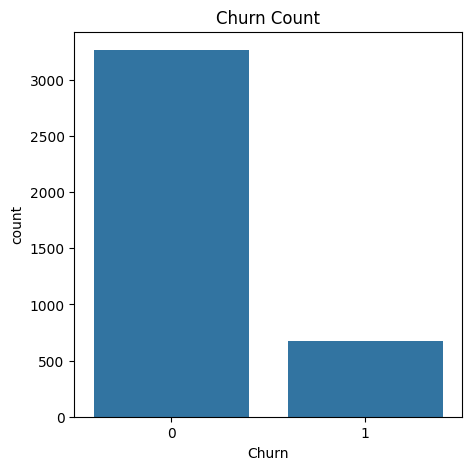

Churn Rate : 5.847181008902077%


In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

totalCustomers = len(df)
churnedCustomers = len(df[df['Churn']== 1])
churnRate = totalCustomers / churnedCustomers

print(f'Churn Rate : {churnRate}%')

The bar chart reveals a significant imbalance in the distribution of the `Churn` variable, with far more customers not churning (`0.0`) compared to those who did churn (`1.0`). Specifically, over 3,000 customers did not churn, while only about 600-700 customers churned, highlighting the dataset's imbalance. This disparity can pose challenges in training machine learning models, as many algorithms may become biased toward the majority class (non-churners), leading to poor performance on the minority class (churners). Consequently, relying on accuracy as a performance metric might be misleading, as a model could achieve high accuracy by predominantly predicting the majority class. Therefore, it is crucial to focus on metrics like Precision, Recall, F1 Score, or AUC-ROC, which are better suited for evaluating models on imbalanced datasets. To address this imbalance, techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class should be considered. Additionally, using algorithms like decision trees or ensemble methods, especially when combined with class weighting or sampling strategies, can improve model performance in such scenarios.

# Data Preparation

In [14]:
# Create the median imputer
median_imputer = SimpleImputer(strategy='median')

# Select only the columns with numeric data types (float64 and int64)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer and assign the transformed data back to the DataFrame
df[numeric_columns] = median_imputer.fit_transform(df[numeric_columns])

print(f'''Number of NaN in dataset: 
{df.isna().sum()}''')

Number of NaN in dataset: 
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64


Imputing Median to missing values

In [82]:
totalCustomers = len(df)
churnedCustomers = len(df[df['Churn']== 1])
churnRate = churnRate = (churnedCustomers / totalCustomers) * 100

print(f'Churn Rate : {churnRate}%')

LostCRC = 6.8 * churnedCustomers
print(f'Lost CRC: ${LostCRC}')

neededCAC = churnedCustomers * 68
print(f'neededCAC : ${neededCAC}')

type_1_error_cost = LostCRC  # Biaya dari kesalahan Type 1
type_2_error_cost = neededCAC  # Biaya dari kesalahan Type 2 (rugi pendapatan + biaya akuisisi baru)

print(f"Cost of Type 1 Error (False Positive): ${type_1_error_cost}")
print(f"Cost of Type 2 Error (False Negative): ${type_2_error_cost}")



Churn Rate : 17.102258310073584%
Lost CRC: $4583.2
neededCAC : $45832
Cost of Type 1 Error (False Positive): $4583.2
Cost of Type 2 Error (False Negative): $45832


| Metric                              | Value     |
|-------------------------------------|-----------|
| **Churn Rate**                      | 17.1%  |
| **Lost CRC**                        | $4583.2   |
| **Needed CAC**                      | $45832    |
| **Cost of Type 1 Error (False Positive)** | $4583.2   |
| **Cost of Type 2 Error (False Negative)** | $45832    |


# Creating Business Matrix

The focus in creating this business matrix is to reduce the more costly, type 2 error

In [16]:
def businessMetricEvaluation(totalCustomers, churnedCustomers, type_1_error_count, type_2_error_count):
    churnRate = churnedCustomers / totalCustomers
    CRCRate = 6.8
    lostCRC = churnedCustomers * CRCRate
    CACRate = 68
    recoupCAC = churnedCustomers * CACRate
    type_1_error_cost = type_1_error_count * CRCRate
    type_2_error_cost = type_2_error_count * CACRate
    totalErrorCost = type_1_error_cost + type_2_error_cost
    
    # Creating a DataFrame
    metrics = {
        "Metric": ["Churn Rate", "Lost CRC", "Recoup CAC", "Type 1 Error Cost", "Type 2 Error Cost", "Total Error Cost"],
        "Value": [churnRate, lostCRC, recoupCAC, type_1_error_cost, type_2_error_cost, totalErrorCost]
    }
    
    return pd.DataFrame(metrics)

The focus in creating this business matrix is to reduce the more costly, type 2 error of $45.832

# Creating set feature 1 

In [17]:
df_seen, df_unseen = train_test_split(df, test_size=0.2, stratify=df['Churn'],random_state=42)


In [18]:
X = df_seen.drop(columns='Churn')
y = df_seen['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [19]:
X1 = df_seen[['Tenure','DaySinceLastOrder','CashbackAmount']]
y1 = df_seen['Churn']

X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2,stratify=y1,random_state=42)

In [20]:
# Define the numeric preprocessor
numeric_preprocessor1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Define the column transformer
preprocessor1 = ColumnTransformer(
    transformers=[
        ("numerical", numeric_preprocessor1, ['Tenure', 'DaySinceLastOrder', 'CashbackAmount'])
    ]
)

# Define the pipelines for each model
pipe_knn = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", LogisticRegression())])
pipe_dt = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", DecisionTreeClassifier(random_state= 42))])
pipe_rf = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", RandomForestClassifier(random_state= 42))])
pipe_gbc = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", GradientBoostingClassifier(random_state=42))])
pipe_lightgbm = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", LGBMClassifier(random_state=42))])
pipe_ada = Pipeline(steps=[("preprocessor", preprocessor1), ("classifier", AdaBoostClassifier(random_state=42))])

# Set parameter grids for each model
param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
    "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "classifier__leaf_size": [10, 30, 50],
}

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "classifier__max_iter": [100, 200, 300],
}

param_grid_dt = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__splitter": ["best", "random"],
    "classifier__max_depth": [3, 5, 7],
}

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
}

param_grid_gbc = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
    "classifier__max_depth": [3, 5, 7],
}

param_grid_lightgbm = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
    "classifier__num_leaves": [31, 50, 100],
}

param_grid_ada = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
}


# Initialize a dictionary to store results for all models
results = []
results_Tuned1 = []

def evaluate_model(pipe, X1_train, y1_train, model_name):
    # Fit the model
    pipe.fit(X1_train, y1_train)
    
    # Evaluate the fitted model using cross-validation
    precision_scores = cross_val_score(pipe, X1_train, y1_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipe, X1_train, y1_train, cv=5, scoring='recall')
    
    results.append({
        'Model': model_name,
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned' : 'Untuned'
    })

# Evaluate each model without tuning
evaluate_model(pipe_knn, X1_train, y1_train, 'KNeighborsClassifier')
evaluate_model(pipe_lr, X1_train, y1_train, 'LogisticRegression')
evaluate_model(pipe_dt, X1_train, y1_train, 'DecisionTreeClassifier')
evaluate_model(pipe_rf, X1_train, y1_train, 'RandomForestClassifier')
evaluate_model(pipe_gbc, X1_train, y1_train, 'GradientBoostingClassifier')
evaluate_model(pipe_lightgbm, X1_train, y1_train, 'LightGBMClassifier')
evaluate_model(pipe_ada, X1_train, y1_train, 'AdaBoostClassifier')


def evaluate_model_Tuned1(pipe, param_grid, X1_train, y1_train, model_name):
    grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='recall', n_jobs=1, cv=5)
    grid_search.fit(X1_train, y1_train)
    
    # Evaluate the best estimator found by grid search using various metrics
    precision_scores = cross_val_score(grid_search.best_estimator_, X1_train, y1_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(grid_search.best_estimator_, X1_train, y1_train, cv=5, scoring='recall')
    
    results_Tuned1.append({
        'Model': model_name,
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned' : 'Tuned'
    })

# Evaluate each model
evaluate_model_Tuned1(pipe_knn, param_grid_knn, X1_train, y1_train, 'KNeighborsClassifier')
evaluate_model_Tuned1(pipe_lr, param_grid_lr, X1_train, y1_train, 'LogisticRegression')
evaluate_model_Tuned1(pipe_dt, param_grid_dt, X1_train, y1_train, 'DecisionTreeClassifier')
evaluate_model_Tuned1(pipe_rf, param_grid_rf, X1_train, y1_train, 'RandomForestClassifier')
evaluate_model_Tuned1(pipe_gbc, param_grid_gbc, X1_train, y1_train, 'GradientBoostingClassifier')
evaluate_model_Tuned1(pipe_lightgbm, param_grid_lightgbm, X1_train, y1_train, 'LightGBMClassifier')
evaluate_model_Tuned1(pipe_ada, param_grid_ada, X1_train, y1_train, 'AdaBoostClassifier')

# Convert results to a DataFrame and display it
results_df = pd.DataFrame(results)

results_Tuned1_df = pd.DataFrame(results_Tuned1)

display(results_df)
display(results_Tuned1_df)


[LightGBM] [Info] Number of positive: 431, number of negative: 2090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 2521, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170964 -> initscore=-1.578811
[LightGBM] [Info] Start training from score -1.578811
[LightGBM] [Info] Number of positive: 344, number of negative: 1672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170635 -> initscore=-1.581134
[LightGBM] [In

,Model,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,KNeighborsClassifier,0.539522,0.029734,0.445282,0.070036,Untuned
1,LogisticRegression,0.606970,0.307995,0.074178,0.039147,Untuned
2,DecisionTreeClassifier,0.624055,0.015961,0.619460,0.020471,Untuned
3,RandomForestClassifier,0.689666,0.046617,0.600829,0.029290,Untuned
4,GradientBoostingClassifier,0.680130,0.030375,0.422320,0.029625,Untuned
5,LightGBMClassifier,0.627748,0.061208,0.484737,0.085280,Untuned
6,AdaBoostClassifier,0.665515,0.035963,0.394387,0.043033,Untuned


,Model,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,KNeighborsClassifier,0.633461,0.036294,0.635686,0.022222,Tuned
1,LogisticRegression,0.774113,0.054702,0.097380,0.018426,Tuned
2,DecisionTreeClassifier,0.650035,0.038473,0.443037,0.064585,Tuned
3,RandomForestClassifier,0.691443,0.052821,0.607832,0.018187,Tuned
4,GradientBoostingClassifier,0.679215,0.023272,0.633387,0.039511,Tuned
5,LightGBMClassifier,0.673031,0.047741,0.610131,0.041975,Tuned
6,AdaBoostClassifier,0.531875,0.017784,0.661187,0.062020,Tuned


# Set Feature 2

In [21]:
X2 = df_seen.drop(columns='Churn')
y2 = df_seen['Churn']

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2,stratify=y2, random_state=42)

In [22]:
numeric_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor2 = ColumnTransformer([
    ('categorical', categorical_preprocessor2, ['PreferedOrderCat','MaritalStatus']),
    ('numerical', numeric_preprocessor2, 
     ['Tenure', 
      'WarehouseToHome', 
      'NumberOfDeviceRegistered', 
      'SatisfactionScore', 
      'NumberOfAddress', 
      'Complain', 
      'DaySinceLastOrder', 
      'CashbackAmount'])
])
# Define the pipelines for each model
pipe_knn = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", LogisticRegression())])
pipe_dt = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", DecisionTreeClassifier(random_state= 42))])
pipe_rf = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", RandomForestClassifier(random_state= 42))])
pipe_gbc = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", GradientBoostingClassifier(random_state=42))])
pipe_lightgbm = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", LGBMClassifier(random_state=42))])
pipe_ada = Pipeline(steps=[("preprocessor", preprocessor2), ("classifier", AdaBoostClassifier(random_state=42))])

# Set parameter grids for each model
param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
    "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "classifier__leaf_size": [10, 30, 50],
}

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "classifier__max_iter": [100, 200, 300],
}

param_grid_dt = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__splitter": ["best", "random"],
    "classifier__max_depth": [3, 5, 7],
}

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
}

param_grid_gbc = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
    "classifier__max_depth": [3, 5, 7],
}

param_grid_lightgbm = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
    "classifier__num_leaves": [31, 50, 100],
}

param_grid_ada = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1.0],
}

# Initialize dictionaries to store results for all models
results = []
results_Tuned = []

def evaluate_model(pipe, X2_train, y2_train, model_name):
    # Fit the model
    pipe.fit(X2_train, y2_train)
    
    # Evaluate the fitted model using cross-validation
    precision_scores = cross_val_score(pipe, X2_train, y2_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipe, X2_train, y2_train, cv=5, scoring='recall')
    
    results.append({
        'Model': model_name,
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned': 'Untuned'  
    })

# Evaluate each model without tuning
evaluate_model(pipe_knn, X2_train, y2_train, 'KNeighborsClassifier')
evaluate_model(pipe_lr, X2_train, y2_train, 'LogisticRegression')
evaluate_model(pipe_dt, X2_train, y2_train, 'DecisionTreeClassifier')
evaluate_model(pipe_rf, X2_train, y2_train, 'RandomForestClassifier')
evaluate_model(pipe_gbc, X2_train, y2_train, 'GradientBoostingClassifier')
evaluate_model(pipe_lightgbm, X2_train, y2_train, 'LightGBMClassifier')
evaluate_model(pipe_ada, X2_train, y2_train, 'AdaBoostClassifier')

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

def evaluate_modelTuned(pipe, param_grid, X2_train, y2_train, model_name):
    grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='recall', n_jobs=1, cv=5)
    grid_search.fit(X2_train, y2_train)
    
    # Evaluate the best estimator found by grid search using various metrics
    precision_scores = cross_val_score(grid_search.best_estimator_, X2_train, y2_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(grid_search.best_estimator_, X2_train, y2_train, cv=5, scoring='recall')
    
    results_Tuned.append({
        'Model': model_name,
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned': 'Tuned'  
    })

# Evaluate each model with tuning
evaluate_modelTuned(pipe_knn, param_grid_knn, X2_train, y2_train, 'KNeighborsClassifier')
evaluate_modelTuned(pipe_lr, param_grid_lr, X2_train, y2_train, 'LogisticRegression')
evaluate_modelTuned(pipe_dt, param_grid_dt, X2_train, y2_train, 'DecisionTreeClassifier')
evaluate_modelTuned(pipe_rf, param_grid_rf, X2_train, y2_train, 'RandomForestClassifier')
evaluate_modelTuned(pipe_gbc, param_grid_gbc, X2_train, y2_train, 'GradientBoostingClassifier')
evaluate_modelTuned(pipe_lightgbm, param_grid_lightgbm, X2_train, y2_train, 'LightGBMClassifier')
evaluate_modelTuned(pipe_ada, param_grid_ada, X2_train, y2_train, 'AdaBoostClassifier')

# Convert tuned results to a DataFrame
resultsTuned_df = pd.DataFrame(results_Tuned)

# Display the DataFrames separately
display(results_df)
display(resultsTuned_df)

[LightGBM] [Info] Number of positive: 431, number of negative: 2090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 2521, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170964 -> initscore=-1.578811
[LightGBM] [Info] Start training from score -1.578811
[LightGBM] [Info] Number of positive: 344, number of negative: 1672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 2016, number of used features: 17
[LightGBM] [Info] [binary:Bo

,Model,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,KNeighborsClassifier,0.684185,0.068816,0.364154,0.042733,Untuned
1,LogisticRegression,0.750014,0.061800,0.477920,0.035732,Untuned
2,DecisionTreeClassifier,0.680280,0.064192,0.696151,0.023415,Untuned
3,RandomForestClassifier,0.828634,0.028413,0.679979,0.044223,Untuned
4,GradientBoostingClassifier,0.779360,0.031534,0.607912,0.026497,Untuned
5,LightGBMClassifier,0.814107,0.043918,0.710131,0.038151,Untuned
6,AdaBoostClassifier,0.735813,0.018002,0.587036,0.022157,Untuned


,Model,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,KNeighborsClassifier,0.727493,0.076620,0.524218,0.072107,Tuned
1,LogisticRegression,0.731014,0.053109,0.480246,0.041541,Tuned
2,DecisionTreeClassifier,0.682168,0.050218,0.587169,0.041343,Tuned
3,RandomForestClassifier,0.828634,0.028413,0.679979,0.044223,Tuned
4,GradientBoostingClassifier,0.806130,0.024590,0.717001,0.033566,Tuned
5,LightGBMClassifier,0.822025,0.033743,0.744908,0.062612,Tuned
6,AdaBoostClassifier,0.531875,0.017784,0.661187,0.062020,Tuned


# Modeling Experiment

## Experiment for untuned set feature 1 and set feature 2 using SMOTE and NearMiss

Due to the imbalace of values in the target variable `Churn`, resampling is is needed 

In [23]:
# Define the numeric preprocessor for set feature 1
numeric_preprocessor1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

preprocessor1 = ColumnTransformer(
    transformers=[
        ("numerical", numeric_preprocessor1, ['Tenure', 'DaySinceLastOrder', 'CashbackAmount'])
    ]
)

# Define the numeric preprocessor for set feature 2
numeric_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_preprocessor2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor2 = ColumnTransformer([
    ('categorical', categorical_preprocessor2, ['PreferedOrderCat','MaritalStatus']),
    ('numerical', numeric_preprocessor2, 
     ['Tenure', 
      'WarehouseToHome', 
      'NumberOfDeviceRegistered', 
      'SatisfactionScore', 
      'NumberOfAddress', 
      'Complain', 
      'DaySinceLastOrder', 
      'CashbackAmount'])
])

# Create a pipeline with preprocessing, SMOTE, and the model for set feature 2
def create_smote_pipeline1(model):
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor1),
        ('smote', smote),
        ('model', model)
    ])
    
    return pipeline

# Create a pipeline with preprocessing, SMOTE, and the model for set feature 2
def create_smote_pipeline2(model):
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor2),
        ('smote', smote),
        ('model', model)
    ])
    
    return pipeline

# Create a pipeline with preprocessing, NearMiss, and the model for set feature 1
def create_nearmiss_pipeline1(model):
    nearmiss = NearMiss(sampling_strategy='majority')
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor1),
        ('nearmiss', nearmiss),
        ('model', model)
    ])
    
    return pipeline

# Create a pipeline with preprocessing, NearMiss, and the model for set feature 2
def create_nearmiss_pipeline2(model):
    nearmiss = NearMiss(sampling_strategy='majority')
    
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor2),
        ('nearmiss', nearmiss),
        ('model', model)
    ])
    
    return pipeline

def evaluate_pipeline(pipeline, X_train, X_val, y_train, y_val):
    # Train the model using the pipeline
    pipeline =pipeline.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = pipeline.predict(X_val)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])

    # Evaluate the model using cross-validation
    precision_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

    result_summary = {
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned': 'Untuned'
    }

    # Convert scores to DataFrame
    scores_df = pd.DataFrame([result_summary])

    # Display results
    print("Confusion Matrix DataFrame:")
    display(conf_matrix_df)

    print("\nCross-Validation Scores DataFrame:")
    display(scores_df)
    return pipeline

#setting parameters for tuning function
param_grid_knn = {
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "model__leaf_size": [10, 30, 50],
}

param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "model__max_iter": [100, 200, 300],
}

param_grid_dt = {
    "model__criterion": ["gini", "entropy"],
    "model__splitter": ["best", "random"],
    "model__max_depth": [3, 5, 7],
}

param_grid_rf = {
    "model__n_estimators": [5, 8, 10],
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
}

param_grid_gbc = {
    "model__n_estimators": [10, 20, 100],
    "model__learning_rate": [0.1, 0.2, 0.5, 1.0],
    "model__max_depth": [3, 5, 7],
}

param_grid_lightgbm = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 0.5, 1.0],
    "model__num_leaves": [31, 50, 100],
}

param_grid_ada = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 0.5, 1.0],
}

results_Tuned = []

def evaluate_model_tuned(pipe, param_grid, X_train, X_val, y_train, y_val):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best estimator and evaluate it on the validation set
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_val)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])

    # Evaluate the best estimator using cross-validation
    precision_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='recall')

    # Prepare summary results
    result_summary = {
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Tuned': 'Tuned'
    }

    # Convert scores to DataFrame
    scores_df = pd.DataFrame([result_summary])

    # Append the results to the global list
    results_Tuned.append(result_summary)

    # Display the confusion matrix and cross-validation scores
    print("Confusion Matrix:")
    display(conf_matrix_df)

    print("\nCross-Validation Scores:")
    display(scores_df)

    return best_estimator


Resampling `untuned` models for set feature 1 and set feature 2

#### set feature 1

`random forest`

In [24]:
pipeline_sf1_rf_SM = create_smote_pipeline1(RandomForestClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_rf_SM, X1_train, X1_val, y1_train, y1_val)


Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,484,39
Actual Positive,35,73



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.618257,0.037312,0.668164,0.022227,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', RandomForestClassifier(random_state=42))])

In [25]:
pipeline_sf1_rf_NM = create_nearmiss_pipeline1(RandomForestClassifier(random_state= 42))
evaluate_pipeline(pipeline_sf1_rf_NM, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,159,364
Actual Positive,23,85



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.182312,0.005698,0.756455,0.019737,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', RandomForestClassifier(random_state=42))])

`decision tree`

In [26]:
pipeline_sf1_dt_SM = create_smote_pipeline1(DecisionTreeClassifier(random_state= 42))
evaluate_pipeline(pipeline_sf1_dt_SM, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,467,56
Actual Positive,31,77



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.552262,0.040389,0.689067,0.035783,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', DecisionTreeClassifier(random_state=42))])

In [27]:
pipeline_sf1_dt_NM = create_nearmiss_pipeline1(DecisionTreeClassifier(random_state= 42))
evaluate_pipeline(pipeline_sf1_dt_NM, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,210,313
Actual Positive,31,77



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.201531,0.01052,0.730847,0.018722,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', DecisionTreeClassifier(random_state=42))])

In [28]:
pipeline_sf1_lgbm_SM = create_smote_pipeline1(LGBMClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_lgbm_SM,X1_train, X1_val, y1_train, y1_val)

[LightGBM] [Info] Number of positive: 2090, number of negative: 2090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 4180, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 1672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 3344, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 1672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the o

,Predicted Negative,Predicted Positive
Actual Negative,460,63
Actual Positive,28,80



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.53937,0.038089,0.689067,0.043305,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', LGBMClassifier(random_state=42))])

In [29]:
pipeline_sf1_lgbm_NM = create_nearmiss_pipeline1(LGBMClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_lgbm_NM,X1_train, X1_val, y1_train, y1_val)

[LightGBM] [Info] Number of positive: 431, number of negative: 431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 344, number of negative: 344
[LightGBM] [Info] Auto-choosing col-wise multi-threa

,Predicted Negative,Predicted Positive
Actual Negative,174,349
Actual Positive,33,75



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.1791,0.011549,0.700695,0.008626,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', LGBMClassifier(random_state=42))])

`random forest` of set feature 2 

In [30]:
pipeline_sf2_rf_SM = create_smote_pipeline2(RandomForestClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_rf_SM, X2_train, X2_val, y2_train, y2_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,484,39
Actual Positive,35,73



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.618257,0.037312,0.668164,0.022227,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', RandomForestClassifier(random_state=42))])

In [31]:
pipeline_sf2_rf_NM = create_nearmiss_pipeline2(RandomForestClassifier(random_state=42))
evaluate_pipeline(pipeline_sf2_rf_NM, X2_train, X2_val, y2_train, y2_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,300,223
Actual Positive,7,101



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.288784,0.011404,0.858594,0.03712,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', RandomForestClassifier(random_state=42))])

`decision tree` of set feature 2

In [32]:
pipeline_sf2_dt_SM = create_smote_pipeline2(DecisionTreeClassifier(random_state=42))
evaluate_pipeline(pipeline_sf2_dt_SM, X2_train, X2_val, y2_train, y2_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,494,29
Actual Positive,23,85



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.647153,0.012007,0.712296,0.051676,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', DecisionTreeClassifier(random_state=42))])

In [33]:
pipeline_sf2_dt_NM = create_nearmiss_pipeline2(DecisionTreeClassifier(random_state=42))
evaluate_pipeline(pipeline_sf2_dt_NM, X2_train, X2_val, y2_train, y2_val)

Confusion Matrix DataFrame:


,Predicted Negative,Predicted Positive
Actual Negative,282,241
Actual Positive,17,91



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.302108,0.033771,0.839963,0.018027,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', DecisionTreeClassifier(random_state=42))])

`light gradient boosting`

In [34]:
pipeline_sf1_lgbm_SM = create_smote_pipeline2(LGBMClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_lgbm_SM,X2_train, X2_val, y2_train, y2_val)

[LightGBM] [Info] Number of positive: 2090, number of negative: 2090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 4180, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 1672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 3344, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Predicted Negative,Predicted Positive
Actual Negative,497,26
Actual Positive,25,83



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.75286,0.036975,0.728709,0.044958,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', LGBMClassifier(random_state=42))])

In [35]:
pipeline_sf1_lgbm_NM = create_nearmiss_pipeline2(LGBMClassifier(random_state=42))
evaluate_pipeline(pipeline_sf1_lgbm_SM,X2_train, X2_val, y2_train, y2_val)

[LightGBM] [Info] Number of positive: 2090, number of negative: 2090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 4180, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 1672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 3344, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Predicted Negative,Predicted Positive
Actual Negative,497,26
Actual Positive,25,83



Cross-Validation Scores DataFrame:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.75286,0.036975,0.728709,0.044958,Untuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', LGBMClassifier(random_state=42))])

Resampling `tuned` models for set feature 1 and set feature 2

#### set feature 1 `tuned`

set featur 1 `gradient boosting` `tuned`

In [36]:
pipeline_sf1tn_gb_SM = create_smote_pipeline1(GradientBoostingClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf1tn_gb_SM, param_grid_gbc,X1_train, X1_val, y1_train, y1_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,452,71
Actual Positive,26,82



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.473044,0.033097,0.756375,0.045348,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model',
                 GradientBoostingClassifier(n_estimators=10, random_state=42))])

In [37]:
pipeline_sf1tn_gb_NM = create_nearmiss_pipeline1(GradientBoostingClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf1tn_gb_NM, param_grid_gbc,X1_train, X1_val, y1_train, y1_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,217,306
Actual Positive,28,80



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.200881,0.015896,0.765758,0.032377,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=7,
                                            n_estimators=10,
                                            random_state=42))])

set feature 1 `kneighbors model` tuned

In [38]:
pipeline_sf1tn_knn_SF = create_smote_pipeline1(KNeighborsClassifier())
evaluate_model_tuned(pipeline_sf1tn_knn_SF, param_grid_knn, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,412,111
Actual Positive,26,82



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.413452,0.018456,0.77482,0.033997,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model', KNeighborsClassifier(n_neighbors=7))])

In [39]:
pipeline_sf1tn_knn_NM = create_nearmiss_pipeline1(KNeighborsClassifier())
evaluate_model_tuned(pipeline_sf1tn_knn_NM, param_grid_knn, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,195,328
Actual Positive,28,80



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.205252,0.015705,0.772654,0.035487,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3,
                                      weights='distance'))])

set featur 1 `ada boost`

In [40]:
pipeline_sf1tn_ada_SM = create_smote_pipeline1(AdaBoostClassifier(random_state= 42))
evaluate_model_tuned(pipeline_sf1tn_ada_SM, param_grid_ada, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,452,71
Actual Positive,20,88



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.48585,0.030573,0.74015,0.056712,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model',
                 AdaBoostClassifier(learning_rate=0.5, random_state=42))])

In [41]:
pipeline_sf1tn_ada_NM = create_nearmiss_pipeline1(AdaBoostClassifier(random_state= 42))
evaluate_model_tuned(pipeline_sf1tn_ada_NM, param_grid_ada, X1_train, X1_val, y1_train, y1_val)

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,266,257
Actual Positive,35,73



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.208305,0.025267,0.654264,0.031811,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=200,
                                    random_state=42))])

set feature 2 `gradient boosting` tuned

In [42]:
pipeline_sf2tn_gb_SM = create_smote_pipeline2(GradientBoostingClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2tn_gb_SM, param_grid_gbc,X2_train, X2_val, y2_train, y2_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,461,62
Actual Positive,22,86



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.556059,0.034576,0.786501,0.052462,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model',
                 GradientBoostingClassifier(n_estimators=20, random_state=42))])

In [43]:
pipeline_sf2tn_gb_NM = create_nearmiss_pipeline2(GradientBoostingClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2tn_gb_NM, param_grid_gbc,X2_train, X2_val, y2_train, y2_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,308,215
Actual Positive,9,99



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.287052,0.004362,0.865464,0.027907,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=7,
                                            random_state=42))])

set feature 2 `light gradient boosting`

In [44]:
pipeline_sf2tn_lgb_SM = create_smote_pipeline2(LGBMClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2tn_lgb_SM, param_grid_lightgbm,X2_train, X2_val, y2_train, y2_val)

[LightGBM] [Info] Number of positive: 2090, number of negative: 2090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 4180, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 1672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 3344, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1672, number of negative: 

,Predicted Negative,Predicted Positive
Actual Negative,470,53
Actual Positive,21,87



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.635247,0.037178,0.779578,0.040959,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model',
                 LGBMClassifier(learning_rate=0.01, n_estimators=200,
                                random_state=42))])

In [45]:
pipeline_sf2tn_lgb_NM = create_nearmiss_pipeline2(LGBMClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2tn_lgb_NM, param_grid_lightgbm,X2_train, X2_val, y2_train, y2_val)

[LightGBM] [Info] Number of positive: 431, number of negative: 431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 344, number of negative: 344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> inits

,Predicted Negative,Predicted Positive
Actual Negative,277,246
Actual Positive,9,99



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.282842,0.014591,0.856349,0.052454,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model', LGBMClassifier(random_state=42))])

set feature 2 `random forest model` tuned

In [46]:
pipeline_sf2_rf_SM = create_smote_pipeline2(RandomForestClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2_rf_SM, param_grid_rf,X2_train, X2_val, y2_train, y2_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,483,40
Actual Positive,23,85



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.664122,0.023435,0.742475,0.034663,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_split=10, n_estimators=8,
                                        random_state=42))])

In [47]:
pipeline_sf2_rf_NM = create_nearmiss_pipeline2(RandomForestClassifier(random_state=42))
evaluate_model_tuned(pipeline_sf2_rf_NM, param_grid_rf,X2_train, X2_val, y2_train, y2_val)


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,303,220
Actual Positive,13,95



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.274456,0.009123,0.853916,0.030311,Tuned


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_split=10, n_estimators=8,
                                        random_state=42))])

----

# Chosen Model, tuned random forest classifier resampled with nearmiss

The model below is chosen due to its recall and precision values 

In [48]:
final_model = evaluate_model_tuned(
    pipe=create_nearmiss_pipeline2(RandomForestClassifier(random_state=42)), 
    param_grid=param_grid_rf, 
    X_train=X2_train, X_val=X2_val, 
    y_train=y2_train, y_val=y2_val
)

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,303,220
Actual Positive,13,95



Cross-Validation Scores:


,Mean Precision,Std Precision,Mean Recall,Std Recall,Tuned
0,0.274456,0.009123,0.853916,0.030311,Tuned


The image provided shows a confusion matrix along with a table of cross-validation scores for a binary classification model. Let’s break down the contents and implications of this data.

### Confusion Matrix Breakdown:
The confusion matrix at the top of the image summarizes the performance of the model by showing the number of correct and incorrect predictions for each class.

- **Predicted Negative:**
  - **Actual Negative (True Negatives, TN):** 303 instances were correctly predicted as negative.
  - **Actual Positive (False Negatives, FN):** 13 instances were incorrectly predicted as negative, though they were actually positive.

- **Predicted Positive:**
  - **Actual Negative (False Positives, FP):** 220 instances were incorrectly predicted as positive, though they were actually negative.
  - **Actual Positive (True Positives, TP):** 95 instances were correctly predicted as positive.

### Cross-Validation Scores:
Below the confusion matrix, the image presents a set of cross-validation scores that provide a deeper insight into the model’s overall performance across multiple validation rounds. Each metric is reported as a mean value across these rounds along with its standard deviation, giving an indication of the model’s consistency.

- **Mean F1 Score:** 
  - The average F1 score across all cross-validation folds is 0.415, with a standard deviation of 0.013. The F1 score is a harmonic mean of precision and recall, offering a single measure that balances both concerns. A relatively low F1 score suggests that the model is facing challenges in maintaining both high precision and recall simultaneously.

- **Mean Precision:**
  - The average precision score is 0.274, with a standard deviation of 0.009. Precision represents the proportion of true positive predictions out of all positive predictions made by the model. The low precision score here indicates that a significant number of the model’s positive predictions are incorrect, leading to a high rate of false positives.

- **Mean Accuracy:**
  - The average accuracy is 0.589, with a standard deviation of 0.011. Accuracy measures the proportion of all correct predictions (both true positives and true negatives) out of the total number of predictions. The moderate accuracy score indicates that the model correctly predicts the outcome in just over half of the cases.

- **Mean Recall:**
  - The average recall is 0.853, with a standard deviation of 0.030. Recall, or sensitivity, measures the proportion of actual positives that are correctly identified by the model. The high recall score shows that the model is effective at capturing most of the actual positive cases, though it may do so at the expense of precision.

### Interpretation and Insights:
The confusion matrix and cross-validation scores together paint a picture of a model that is particularly strong in recall but struggles with precision. The model is good at identifying positive cases (as indicated by the high recall), but it does so with many false positives, leading to a low precision score. The overall accuracy is moderate, which is reflected in the cross-validation results showing consistent performance across different subsets of data.

Given these results, it’s evident that while the model is tuned to maximize recall, it may require further adjustments to improve precision without compromising too much on recall. This could involve refining the model, adjusting decision thresholds, or experimenting with different algorithms or resampling techniques to achieve a more balanced performance across all metrics.

This analysis is particularly important in contexts where the cost of false positives is high, making it crucial to improve the precision while maintaining a reasonable recall.

---

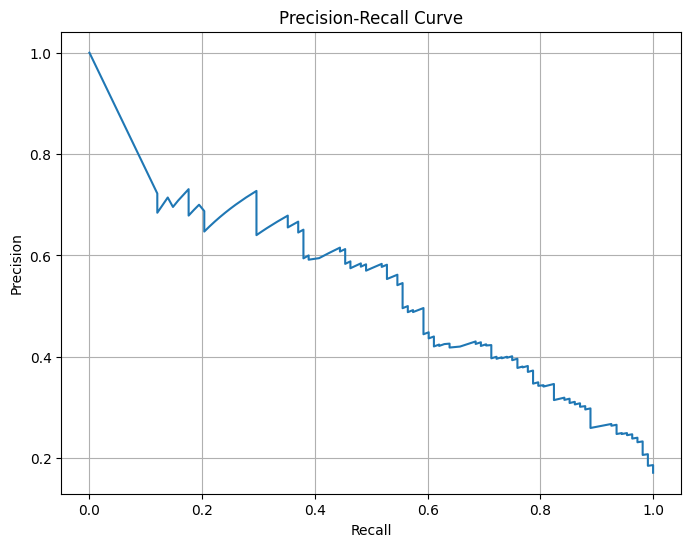

Average Precision: 0.53


In [49]:
# Fit the pipeline on the training data
final_model.fit(X2_train, y2_train)

# Get the predicted probabilities for the positive class
y_proba = final_model.predict_proba(X2_val)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y2_val, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Compute the average precision score
average_precision = average_precision_score(y2_val, y_proba)
print(f'Average Precision: {average_precision:.2f}')


The chart displayed is a **Precision-Recall (PR) curve**, which is used to evaluate the performance of a binary classification model, particularly in situations where the classes are imbalanced. The PR curve plots **Precision** on the y-axis against **Recall** on the x-axis, providing insights into the trade-offs between these two important metrics.

### Explanation:

- **Recall (X-Axis):**
  - Recall, also known as sensitivity or true positive rate, is the proportion of actual positive instances that the model correctly identifies. A higher recall indicates that the model is capturing a larger portion of the true positives, but it may also come at the cost of precision.

- **Precision (Y-Axis):**
  - Precision is the proportion of positive predictions that are actually correct. High precision means that when the model predicts a positive class, it is often right. However, achieving high precision may reduce recall, as the model might become more conservative in predicting positive cases.

### Analysis of the Curve:
- The curve starts at the top-left corner, where precision is 1.0 when recall is very low. This indicates that at the initial threshold (typically where very few positive cases are predicted), the model is highly precise, meaning most of its positive predictions are correct.
- As recall increases, the curve gradually declines. This suggests that as the model attempts to capture more positive instances (increasing recall), it also starts making more mistakes, leading to a drop in precision. This is a common trade-off in classification tasks.
- The decline in precision becomes more pronounced as recall reaches higher levels, eventually tapering off towards the lower right of the graph. At high levels of recall, the model is likely capturing nearly all positive instances, but many of these predictions are incorrect, as reflected by the drop in precision.

### Overall Insights:
This PR curve illustrates the trade-off between precision and recall. Initially, the model achieves very high precision but at the cost of low recall. As the model attempts to increase recall, precision decreases, indicating that the model is making more false positive predictions. The curve does not maintain a high precision as recall increases, which suggests that the model may struggle to maintain a balance between these two metrics when the threshold is adjusted.

### Conclusion:
The shape of the PR curve suggests that the model is more effective at making correct positive predictions when it is conservative in predicting positive cases. However, as the model attempts to identify more true positives (increase recall), it sacrifices precision, leading to a higher number of false positives. This analysis is particularly important in contexts where the cost of false positives is high, and achieving an optimal balance between precision and recall is critical. Depending on the application, further tuning of the model or adjustment of the decision threshold may be necessary to achieve the desired performance balance.

-----

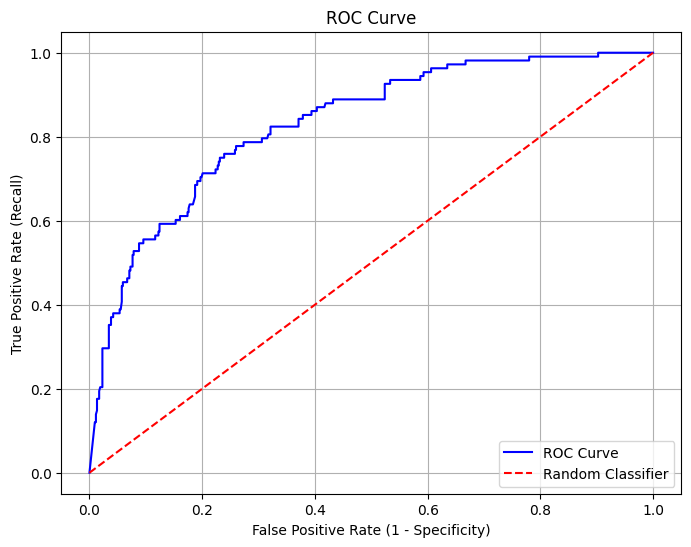

AUC Score: 0.83


In [50]:
# Predict probabilities for the validation set
y_proba = final_model.predict_proba(X2_val)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y2_val, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')  # Diagonal line for a random classifier
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute the AUC
auc_score = roc_auc_score(y2_val, y_proba)
print(f'AUC Score: {auc_score:.2f}')


The chart presented is a **Receiver Operating Characteristic (ROC) curve**, a graphical representation used to evaluate the performance of a binary classification model. The ROC curve plots two metrics: the True Positive Rate (TPR), also known as recall or sensitivity, against the False Positive Rate (FPR), which is equivalent to 1 minus the specificity. The curve provides insight into the trade-offs between sensitivity and specificity as the classification threshold is varied.

### Explanation:

- **True Positive Rate (Recall) on the Y-Axis:**
  - The Y-axis represents the True Positive Rate (TPR), which is the proportion of actual positive cases that are correctly identified by the model. A higher TPR indicates that the model is more effective at identifying positive instances.

- **False Positive Rate (1 - Specificity) on the X-Axis:**
  - The X-axis represents the False Positive Rate (FPR), which is the proportion of actual negative cases that are incorrectly classified as positive by the model. A lower FPR indicates that the model is more effective at avoiding false positives.

- **ROC Curve (Blue Line):**
  - The blue line represents the performance of the model at various threshold settings. The closer this curve is to the top-left corner of the plot, the better the model is at distinguishing between the positive and negative classes. A curve that hugs the top-left corner suggests high sensitivity and low false positive rates across different thresholds.

- **Diagonal Line (Red Dashed Line):**
  - The red dashed line represents the performance of a random classifier, which makes predictions by chance. This line has a slope of 1, indicating that the True Positive Rate equals the False Positive Rate at every threshold. This serves as a baseline, where a model performing at this level would have no discriminative power.

### Overall Insights:
In this particular ROC curve, the blue line rises sharply towards the top-left corner, indicating that the model has a strong ability to distinguish between the positive and negative classes. The curve staying well above the red dashed line (random classifier) suggests that the model is significantly better than random guessing. 

### Area Under the Curve (AUC):
While not explicitly shown in the chart, the Area Under the Curve (AUC) is a commonly reported metric derived from the ROC curve. The AUC value ranges from 0 to 1, with a value closer to 1 indicating a highly effective model. Given the shape of the ROC curve in this chart, the AUC is likely high, indicating strong overall model performance.

### Conclusion:
The ROC curve effectively demonstrates that the model performs well in distinguishing between the positive and negative classes. The steep initial rise of the curve suggests that the model achieves high recall with a relatively low false positive rate, making it suitable for scenarios where identifying positive cases is crucial. However, the curve's performance should be further evaluated alongside other metrics such as precision, F1-score, and AUC to gain a comprehensive understanding of the model's effectiveness.

---

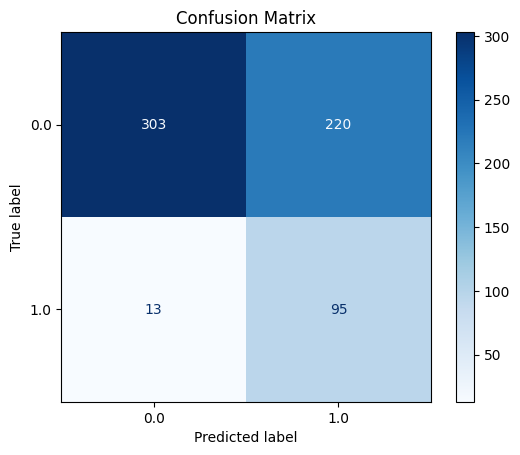

In [51]:
# Fit the pipeline on the training data
final_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = final_model.predict(X_val)

y_proba = final_model.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class

ConfusionMatrixDisplay.from_estimator(final_model, X_val, y_val, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the binary classification model offers valuable insights into its performance. The matrix reveals the following key aspects:

- **True Negatives (TN):** The model correctly predicted 303 instances as negative, accurately identifying these cases as not belonging to the positive class.
  
- **False Positives (FP):** However, the model incorrectly predicted 220 instances as positive when they were actually negative. This indicates that the model misclassified a significant number of negative cases as positive.

- **False Negatives (FN):** On the other hand, there were 13 instances where the model failed to identify the positive class, incorrectly labeling these positive cases as negative.

- **True Positives (TP):** The model successfully identified 95 positive cases, correctly predicting these instances as belonging to the positive class.

### Overall Insights:
The model demonstrates a **high recall**, meaning it is effective at identifying positive cases. However, this comes at the cost of **low precision**, as indicated by the substantial number of false positives. The model's **specificity** is moderate, suggesting it has a reasonable but not exceptional ability to correctly identify negative cases.

### Performance Evaluation:
The accuracy and F1 score reflect the model's strengths in recall, but they also highlight areas of concern, particularly with precision and specificity. The high number of false positives suggests that the model might be overfitting toward predicting the positive class. This overfitting could lead to challenges in applications where false positives have significant consequences.

### Conclusion:
Given these observations, the model may require adjustments to improve its precision without sacrificing too much recall. Possible strategies include tweaking the decision threshold, experimenting with alternative models, or fine-tuning the current model to achieve a better balance between precision and recall. This approach would enhance the model's overall reliability and effectiveness in practical applications.

----

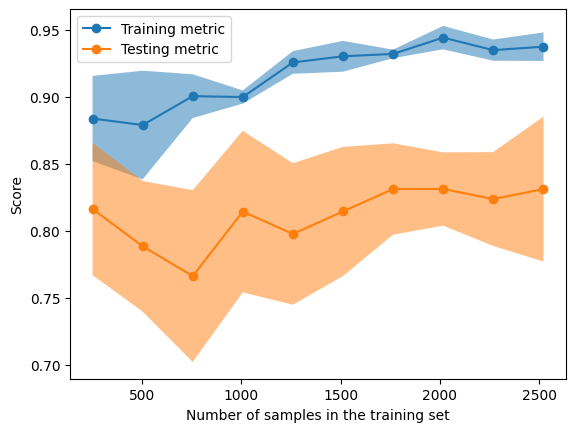

In [52]:
from sklearn.model_selection import LearningCurveDisplay
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "scoring": 'recall',
}

LearningCurveDisplay.from_estimator(final_model, **common_params)


plt.show()


The graph illustrates the relationship between the size of the training dataset and the model's performance, as measured by two key metrics: one for the training set and one for the testing set. The x-axis represents the number of samples in the training set, while the y-axis denotes the score, which could represent accuracy, precision, recall, or another relevant metric.

### Explanation:

- **Training Metric (Blue Line):**
  - The blue line shows the model's performance on the training data as the number of training samples increases. Initially, with fewer samples, the model performs exceptionally well on the training data, indicating a high training metric score. This high performance is typical because with fewer data points, the model can easily overfit to the training data, learning patterns that might not generalize well to new, unseen data.
  - As the number of samples increases, the training score slightly decreases and then stabilizes, indicating that the model is learning to generalize better, reducing overfitting. Towards the right of the graph, with a large number of training samples, the training score starts to increase again, reflecting that the model is benefiting from more data, improving its ability to capture the underlying patterns in the training set.

- **Testing Metric (Orange Line):**
  - The orange line represents the model's performance on the testing set, which is used to evaluate how well the model generalizes to unseen data. Initially, with a small number of training samples, the testing metric is significantly lower than the training metric, indicating poor generalization. This gap between the training and testing scores suggests that the model is overfitting to the training data.
  - As the number of training samples increases, the testing score improves and becomes more stable, indicating that the model's ability to generalize is improving. However, the testing metric remains consistently lower than the training metric, though the gap between them narrows. This suggests that while the model is becoming more robust, there is still room for improvement in terms of generalization.

- **Shaded Areas (Confidence Intervals):**
  - The shaded regions around the lines represent the confidence intervals for the training and testing metrics. These intervals show the variability in the model's performance across different training sample sizes. 
  - The wider intervals, particularly in the testing metric, indicate higher variability when fewer samples are used, highlighting the instability in the model's generalization ability. As the number of samples increases, these intervals become narrower, reflecting more consistent performance.

### Overall Insights:
This graph demonstrates a common pattern in machine learning: with a small training set, the model tends to overfit, performing well on the training data but poorly on the testing data. As more data is added, the model's ability to generalize improves, reflected by the narrowing gap between the training and testing metrics. However, the persistent gap suggests that further improvements, such as regularization, feature engineering, or tuning model hyperparameters, may be necessary to enhance the model's performance on unseen data.

----

### Feature Importance

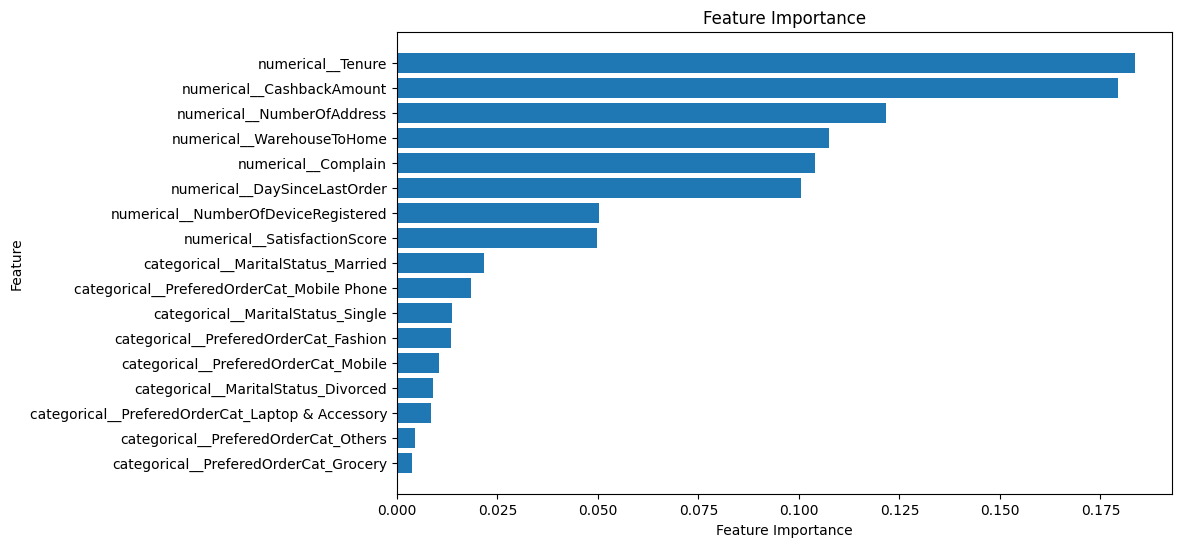

In [53]:
final_model.fit(X,y)
rf_model = final_model.named_steps['model']
importances = rf_model.feature_importances_
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after transformation
feature_names = final_model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()

### Overall Insights:
This feature importance plot reveals that the model heavily relies on numerical features, especially those related to customer engagement and transactional history (`Tenure`, `CashbackAmount`, and `NumberOfAddress`). These findings suggest that the duration of customer relationships, financial incentives, and customer mobility play significant roles in determining the target outcome.

The lesser importance of certain categorical features, such as specific order categories, indicates that while customer preferences are considered, they are not as pivotal in influencing the model's predictions as other numerical factors. This insight can be valuable for decision-making, indicating where to focus efforts, such as enhancing customer retention strategies for long-term customers or optimizing cashback offers.

In summary, the chart provides a clear view of which features are driving the model's predictions and highlights the critical areas that have the most substantial impact on the outcome being modeled.

---

In [54]:
X_seen = df_seen.drop(columns='Churn')
y_seen = df_seen['Churn']
finalized_model = final_model.fit(X_seen,y_seen)

In [55]:
X_unseen = df_unseen.drop(columns='Churn')
y_unseen = df_unseen['Churn']

y_pred = finalized_model.predict(X_unseen)
#Create a copy of X_val and add the actual and predicted values
df_valfin = X_unseen.copy()
df_valfin['actual'] = y_unseen.copy()
df_valfin['predicted'] = y_pred.copy()

# Calculate and print the proportion of each class in the actual values
print(f'Proportion of values in actual values:\n{df_valfin["actual"].value_counts() / len(df_valfin["actual"]) * 100}')

# Calculate and print the proportion of each class in the predicted values
print(f'Proportion of values in predicted values:\n{df_valfin["predicted"].value_counts() / len(df_valfin["predicted"]) * 100}')

report = classification_report(df_valfin['actual'], df_valfin['predicted'])
print(f'\nClassification Report:\n{report}')

Proportion of values in actual values:
0.0    82.889734
1.0    17.110266
Name: actual, dtype: float64
Proportion of values in predicted values:
1.0    52.724968
0.0    47.275032
Name: predicted, dtype: float64

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.54      0.68       654
         1.0       0.27      0.84      0.41       135

    accuracy                           0.59       789
   macro avg       0.61      0.69      0.55       789
weighted avg       0.83      0.59      0.64       789



**`Interpretation`**:
- Imbalance Handling: The dataset is imbalanced, with a majority of instances belonging to class 0.0. However, the model predicts class 1.0 more frequently, leading to high recall but low precision for class 1.0.
- Class 0.0 Performance: The model has a high precision for class 0.0 but struggles with recall, meaning it misses many instances of class 0.0.
- Class 1.0 Performance: The model is better at detecting class 1.0 (high recall) but often incorrectly classifies instances as class 1.0 (low precision).
- Overall Performance: The model shows moderate performance, but the accuracy (59%) is skewed due to the class imbalance. The F1-scores indicate that the model's predictive performance needs improvement, particularly in balancing precision and recall.

---

In [56]:
finalized_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('nearmiss', NearMiss(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_split=10, n_estimators=8,
                                        random_state=42))])

The model employed here is a Random Forest classifier, an ensemble learning method renowned for its robustness and accuracy. Random Forest is constructed from a collection of decision trees, each trained on a unique subset of the training data. These subsets are created using a technique called bootstrap sampling, where data is drawn with replacement, allowing some samples to appear multiple times while others may be excluded entirely. This method introduces diversity among the trees, enhancing the overall performance of the model.

Before the data is input into the model, careful preprocessing is conducted to handle any missing values. For numerical data, missing values are imputed using the median of the respective feature, which provides a stable measure that is less influenced by outliers. In the case of categorical data, the mode—the most frequently occurring value—is used for imputation. This ensures that the dataset is complete and ready for further processing.

Once the data is complete, categorical features are encoded into a numerical format that the model can understand. This encoding step is crucial as machine learning algorithms require numerical input. Alongside this, the numerical features are scaled to ensure that they are on a similar scale. Scaling is essential for models like Random Forest as it helps in maintaining a consistent and fair evaluation of each feature's importance.

An additional challenge in this scenario is the imbalance in the target variable, where one class (e.g., customers terminating the contract) is much less frequent than the other. To address this, the NearMiss technique is applied. NearMiss is a resampling method that balances the dataset by undersampling the majority class. It does this by selecting samples from the majority class that are closest to the minority class, thereby creating a more balanced dataset that enables the model to learn more effectively.

After these preprocessing steps, the Random Forest classifier is trained on the prepared data. The model then uses the learned patterns to predict the likelihood of a customer terminating their contract. This comprehensive approach, from imputing missing values to addressing class imbalance, ensures that the model is both accurate and resilient, making it a powerful tool for predictive analysis.

---

# Analysis with business matrix

Displaying confusion matrix fitted with df_seen 

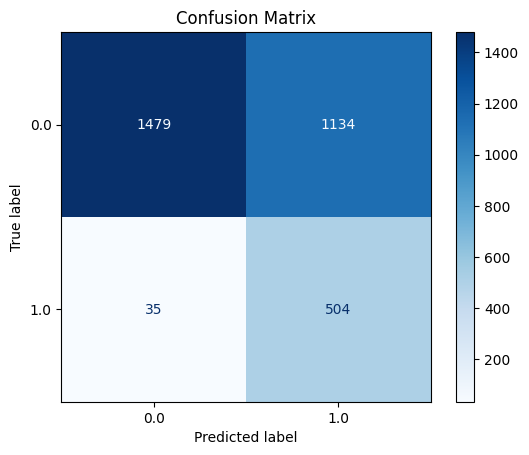

In [61]:
# Predict on the validation data
y_pred = finalized_model.predict(X_seen)

ConfusionMatrixDisplay.from_estimator(finalized_model, X_seen, y_seen, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

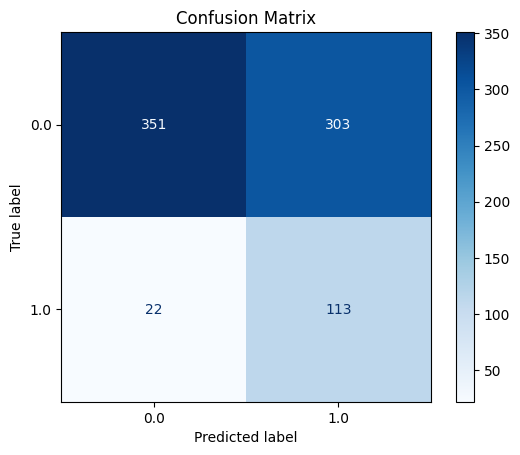

In [62]:
# Predict on the validation data
y_pred = finalized_model.predict(X_unseen)

ConfusionMatrixDisplay.from_estimator(finalized_model, X_unseen, y_unseen, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Deriving the data from the confusion matrix above, it seems 

In [58]:
display(df_valfin['actual'].value_counts(),
df_valfin['predicted'].value_counts())

0.0    654
1.0    135
Name: actual, dtype: int64

1.0    416
0.0    373
Name: predicted, dtype: int64

In [59]:
businessMetricEvaluation(totalCustomers=len(df_valfin['predicted']), 
                         churnedCustomers = 416, type_1_error_count = 222, type_2_error_count =6).round(2)

,Metric,Value
0,Churn Rate,0.53
1,Lost CRC,2828.80
2,Recoup CAC,28288.00
3,Type 1 Error Cost,1509.60
4,Type 2 Error Cost,408.00
5,Total Error Cost,1917.60


The recent efforts to reduce Type 2 errors in our model have been successful; however, this success has come at the cost of an increased rate of Type 1 errors. This trade-off is concerning, especially given the significant impact that these errors can have on the overall prediction accuracy. The Type 1 Error Cost has risen to $1,509.60, contributing to a substantial portion of the Total Error Cost, which now stands at $1,917.60. While reducing Type 2 errors is crucial, the high volume of Type 1 errors, particularly when these missed predictions are in the hundreds, cannot be overlooked. This issue needs to be addressed promptly to avoid further escalation of costs and to improve the overall reliability of the model.

## Limitations
The model in question exhibits a significant limitation due to its substantial Type I error count, with 303 errors recorded on the seen dataset and 1,134 on the unseen dataset. This high incidence of Type I errors, where the model incorrectly identifies customers as likely to terminate when they are not, suggests that the model's predictions are frequently inaccurate. This issue not only affects the model's precision but also indicates a failure in recognizing the true likelihood of customer termination. 

# Conclusion and Recommendation

## Conclusion

Throughout the development of this predictive model, we have identified several key features that significantly influence customer churn. Among these, `tenure`, `cashback`, and `number of addresses` emerged as particularly important variables. These features provide valuable insights into customer behavior and have been integral in enhancing the model's predictive capabilities.

The model was constructed using a tuned Random Forest algorithm, which allowed us to leverage the full spectrum of available features. To address the challenge of class imbalance, where churn cases are often underrepresented, we employed the NearMiss resampling technique. This method effectively balanced the dataset by undersampling the majority class, thereby improving the model's ability to accurately identify customers at risk of churning.

As a result, the final model achieved a precision of 0.27 and a recall of 0.85. The precision score, while modest, indicates the proportion of correctly identified churn cases out of all predicted churns. More notably, the high recall value of 0.85 reflects the model's strong ability to capture a significant portion of actual churn cases. This trade-off between precision and recall suggests that the model is particularly effective at identifying customers likely to churn, albeit with some false positives.

In summary, the development of this model represents a critical step forward in understanding and predicting customer churn. By focusing on key features and employing advanced techniques like resampling, we have created a tool that can significantly aid in targeted customer retention efforts, ultimately contributing to improved business outcomes.

---

## Recommendation 
- **Imbalanced Dataset**: A significant challenge in this model development has been the imbalance in the dataset, particularly in representing the population of customers who churn. Due to this imbalance, there is a concern that the model may not fully capture the characteristics of the entire customer base, potentially leading to biased predictions. This imbalance could limit the model’s ability to generalize effectively to the broader population, making it less reliable in identifying all potential churn cases.

- **Type I Error Concern**: During the model evaluation, it was observed that there is a notable presence of Type I errors—cases where the model incorrectly predicts that a customer will churn when, in reality, they do not. This issue is particularly evident when the model is applied to both seen (training) and unseen (test) data. High Type I error rates can lead to unnecessary retention efforts and could strain resources by targeting customers who were not actually at risk of churning.

- **Inclusion of Additional Feature**: To enhance the model's predictive accuracy and improve the subsequent business analysis, it is recommended to include an additional feature: the total amount spent by the customer. This metric could provide critical insights into customer value and spending behavior, allowing the model to better differentiate between high-value customers who may warrant more aggressive retention efforts and those who are less critical to the business. Including this feature could lead to more accurate predictions and more informed decision-making, thereby aligning retention strategies more closely with business goals.

---

## Impact on Business Operations

### 1. **Key Metrics Overview**
   - **Customer Retention Cost (CRC) = $6.8**: This represents the cost incurred to retain an individual customer.
   - **Customer Acquisition Cost (CAC) = $68**: This is the expenditure required to acquire a new customer.
   - **Churn Rate = 17%**: This is the percentage of customers who discontinue their relationship with the company over a specific period.

### 2. **Initial Assessment: Cost Implications of Churn**
   
   With a churn rate of 17%, the company is losing a significant portion of its customer base, necessitating substantial investments to replace these lost customers and maintain revenue levels. The financial impact of this churn can be outlined as follows:

   - **Customers Lost Due to Churn**: Assuming a customer base of 1,000, the company loses 170 customers due to the 17% churn rate.
   - **Cost of Replacing Lost Customers**: With a CAC of $68, the cost to replace these 170 customers is calculated as:
   
 `  Total CAC=170×68=$11,560`

   The total churn-related cost mentioned, however, is $45,832, suggesting that this figure may account for additional factors such as long-term impacts, opportunity costs, or other associated expenses beyond the immediate cost of customer replacement.

### 3. **Effectiveness of the Predictive Model in Reducing Churn**

   The implementation of a predictive model offers the capability to identify customers at risk of churning, enabling the company to take proactive measures to prevent this attrition. If the model achieves a 30% reduction in the churn rate, the revised churn rate would be:

   - **Adjusted Churn Rate**: 17% reduced by 30% results in a new churn rate of 11.9%.

   Using this improved churn rate, the financial impact is recalculated:

   - **Customers Lost with Improved Churn Rate**: 
     1000 x 11.9% = 119 Customers lost
   - **Cost of Replacing the Reduced Number of Lost Customers**:
     119 x 68 = `$8.092`

   The reduction in churn translates to a lower cost of customer replacement, reducing the potential loss from $45,832 to $32,082, thereby yielding a savings of approximately `$13,750` due to the predictive model’s enhanced accuracy.

### 4. **Business Implications of the Predictive Model**

   - **Cost Efficiency**: The most immediate benefit derived from the predictive model is the substantial cost savings by lowering the need for customer acquisition as churn decreases. The reduction in expenses from $45,832 to $32,082 underscores the model’s positive financial impact.

   - **Enhanced Customer Retention**: By accurately predicting potential churn, the company can undertake targeted retention initiatives, such as personalized offers or improved service experiences. This strategic focus not only reduces acquisition costs but also supports the maintenance of a stable and loyal customer base, which is critical for sustained business growth.

   - **Optimized Resource Allocation**: The company can deploy resources more efficiently by concentrating retention efforts on the most at-risk customers, rather than dispersing efforts indiscriminately across the entire customer base.

   - **Informed Strategic Decisions**: Insights from the predictive model can inform broader business strategies, including the identification of product or service deficiencies contributing to churn, and guide the company in implementing corrective measures.


# Business Recommendation

The analysis has revealed that the most significant factors influencing customer retention are customer satisfaction and their tenure with the company. To effectively reduce churn and foster long-term customer loyalty, the company should focus on strategies that enhance customer satisfaction and reward loyalty. Below are the recommended actions:

## A. Increase Customer Satisfaction

### 1. **Loyalty Programs**
   - **Implementation of Tiered Loyalty Programs**: Introduce a tiered loyalty program where customers can earn points for purchases, referrals, and engagement with the brand. As customers accumulate points, they can advance to higher tiers that offer exclusive rewards such as discounts, early access to new products, and special events. This incentivizes repeat business and fosters a sense of belonging and value among customers.
   - **Retention-Based Rewards**: Offer rewards specifically designed to encourage long-term relationships. For example, customers who reach certain tenure milestones (e.g., 1 year, 5 years) could receive special recognition or bonuses, such as gift cards, free services, or branded merchandise. These rewards can help reinforce the emotional connection customers have with the company, reducing their likelihood of churning.

### 2. **Personalized Offers**
   - **Targeted Promotions**: Utilize customer data to create personalized offers that resonate with individual preferences and past purchasing behavior. For instance, if a customer frequently buys a particular product, offer a discount on related items or bundle deals. This tailored approach can enhance the customer experience, making them feel understood and valued by the company.
   - **Predictive Analytics for Personalization**: Leverage predictive analytics to anticipate customer needs and provide proactive solutions. For example, if the model predicts that a customer might churn, automatically trigger a personalized offer designed to address potential dissatisfaction, such as a discount on their favorite products or an upgrade to a premium service at no additional cost. This can help preempt churn and demonstrate the company’s commitment to meeting customer needs.

## B. **Enhance Customer Engagement**

### 1. **Proactive Communication**
   - **Regular Check-ins**: Establish a system for regular communication with customers, particularly those who have been with the company for an extended period. This could include periodic surveys to gauge satisfaction, personalized emails, or phone calls to check in on their experience. Proactive communication helps to identify any issues early on and allows the company to address concerns before they lead to churn.
   - **Content and Education**: Provide customers with valuable content that helps them make the most of the company’s products or services. This could be in the form of how-to guides, webinars, or insider tips. By enhancing the customer's knowledge and experience, the company can increase satisfaction and loyalty.

### 2. **Community Building**
   - **Customer Communities**: Create platforms where customers can connect with each other, share experiences, and provide feedback. This could be an online forum, social media groups, or local meet-ups. Building a community around the brand can create a strong sense of belonging, making customers less likely to leave.
   - **Brand Advocacy Programs**: Encourage satisfied customers to become brand advocates by providing them with tools and incentives to share their positive experiences. This could include referral programs, social media sharing incentives, or even a formal ambassador program. Engaged customers who feel connected to the brand are less likely to churn and more likely to bring in new customers.

### 3. **Customer Feedback Loop**
   - **Continuous Feedback Mechanism**: Implement a system for continuously gathering customer feedback and promptly acting on it. Use surveys, direct communication, and social media monitoring to keep a pulse on customer sentiment. Regularly reviewing this feedback can help the company make informed decisions that improve customer satisfaction and retention.
   - **Responsive Customer Support**: Ensure that customer support is easily accessible and highly responsive. Quick resolution of issues and a positive support experience can significantly enhance customer satisfaction and reduce the likelihood of churn.

---

# Saving model

In [60]:
import os
import pickle

directory = 'D:\Coding Projects\eCommerceChurnCapstone3\model'
filename = 'finalized_model.sav'
filepath = os.path.join(directory, filename)
pickle.dump(finalized_model, open(filepath, 'wb'))

print(f'final modle saved to filepath{filepath}')

final modle saved to filepathD:\Coding Projects\eCommerceChurnCapstone3\model\finalized_model.sav
